In [21]:
import pandas as pd

# Load your dataset
df = pd.read_csv(r"C:\vs\Pizza\Pizza_Sale.csv")

# Check the DataFrame type
print(type(df))  

df.head() 

print("Dataset Overview:")
print(df.info())  # Data types, non-null count
print("\nSummary Statistics for Numerical Columns:")
print(df.describe())  # Summary statistics for numerical columns


# Count missing values per column
print("\nMissing Data Count per Column:")
missing_values = df.isnull().sum()
print(missing_values)

# Display rows that have missing data
print("\nRows with Missing Data:")
print(df[df.isnull().any(axis=1)])  # Display rows with missing values

# Unique Value Counts per Column

columns_of_interest = [
    'pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'order_date', 
    'order_time', 'unit_price', 'total_price', 'pizza_size', 
    'pizza_category', 'pizza_ingredients'
]

# Print the number of unique values in each column
print("\nUnique Values Count per Column:")
for col in columns_of_interest:
    unique_count = df[col].nunique()
    print(f"{col}: {unique_count} unique values")

# Display the unique values for each column
print("\nUnique Values for Each Column:")
for col in columns_of_interest:
    print(f"\nUnique values in {col}:")
    print(df[col].unique())

# Check for duplicate rows
duplicate_rows = df[df.duplicated()]
print(f"\nNumber of Duplicate Rows: {len(duplicate_rows)}")
print(duplicate_rows)

<class 'pandas.core.frame.DataFrame'>
Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  int64  
 1   order_id           48620 non-null  int64  
 2   pizza_name_id      48604 non-null  object 
 3   quantity           48620 non-null  int64  
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48613 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48597 non-null  object 
 10  pizza_ingredients  48607 non-null  object 
 11  pizza_name         48613 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB
None

Summary Statistics for Numerical Columns:
           pizza_id      order_id      quantity    un

In [22]:
import pandas as pd

# Load your dataset
df = pd.read_csv(r"C:\vs\Pizza\Pizza_Sale.csv")

# Check the DataFrame type
print(type(df))  

df.head() 

# Display rows with missing values in the pizza_ingredients column
missing_ingredients = df.loc[df['pizza_ingredients'].isnull()]

# Print the rows with missing values
print("Rows with missing values in 'pizza_ingredients':")
print(missing_ingredients)

<class 'pandas.core.frame.DataFrame'>
Rows with missing values in 'pizza_ingredients':
     pizza_id  order_id   pizza_name_id  quantity  order_date   order_time  \
580       581       254   five_cheese_l         1  04/01/2015  10:22:13 PM   
581       582       255   five_cheese_l         1  05/01/2015  11:23:35 AM   
582       583       255  green_garden_m         1  05/01/2015  11:23:35 AM   
583       584       255      hawaiian_l         1  05/01/2015  11:23:35 AM   
584       585       255   spinach_fet_m         1  05/01/2015  11:23:35 AM   
585       586       256   pep_msh_pep_l         1  05/01/2015  11:56:06 AM   
586       587       257      cali_ckn_l         1  05/01/2015  11:59:04 AM   
630       631       277   four_cheese_m         1  05/01/2015  03:41:50 PM   
631       632       278   ital_veggie_m         1  05/01/2015  03:49:21 PM   
632       633       278    southw_ckn_l         1  05/01/2015  03:49:21 PM   
633       634       279      cali_ckn_m         1  05/0

Missing values before filling:
 pizza_id              0
order_id              0
pizza_name_id        16
quantity              0
order_date            0
order_time            0
unit_price            0
total_price           7
pizza_size            0
pizza_category       23
pizza_ingredients    13
pizza_name            7
dtype: int64
Missing values after filling:
 pizza_id             0
order_id             0
pizza_name_id        0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

Processing column: pizza_id
Rows before removing outliers:
count    48620.000000
mean     24310.500000
std      14035.529381
min          1.000000
25%      12155.750000
50%      24310.500000
75%      36465.250000
max      48620.000000
Name: pizza_id, dtype: float64

Rows after removing outliers:
count    48620.000000
mean     24310.500000
std  

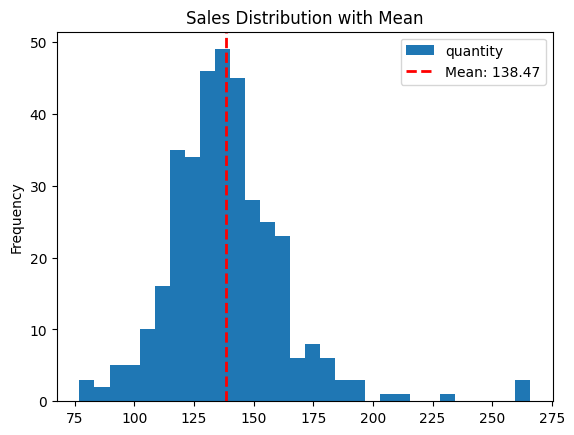

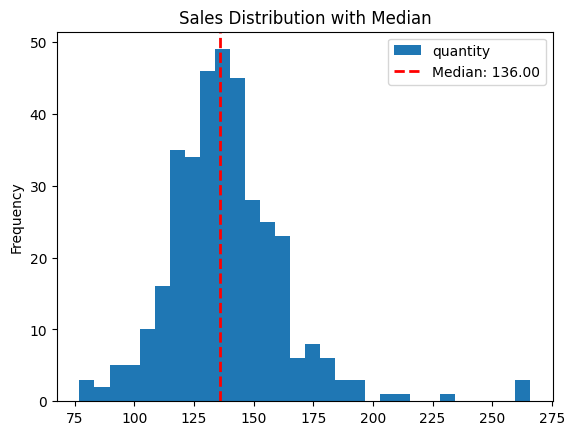

Processed data has been saved to: C:\vs\Pizza\Processed_Sales_Data.csv


In [24]:
##Data cleaning for sales
import pandas as pd
import matplotlib.pyplot as plt
import holidays

# Load your dataset
df = pd.read_csv(r"C:\vs\Pizza\Pizza_Sale.csv")

# Step 1: Fill missing values
print("Missing values before filling:\n", df.isnull().sum())

# List of columns with missing values
columns_with_missing_values = ['pizza_name_id', 'total_price', 'pizza_category', 'pizza_ingredients', 'pizza_name']

# Function to fill missing values in the specified column using other columns
def fill_missing_values(data, column_to_fill, reference_columns):
    for idx, row in data[data[column_to_fill].isnull()].iterrows():
        ref_values = row[reference_columns]
        matching_row = data[(data[reference_columns] == ref_values).all(axis=1) & data[column_to_fill].notnull()]
        if not matching_row.empty:
            data.at[idx, column_to_fill] = matching_row[column_to_fill].values[0]

# Apply the function to each column with missing values
for column in columns_with_missing_values:
    ref_columns = [col for col in columns_with_missing_values if col != column]
    fill_missing_values(df, column, ref_columns)

print("Missing values after filling:\n", df.isnull().sum())

# Step 2: Replace specific values in 'pizza_ingredients'
df['pizza_ingredients'] = df['pizza_ingredients'].replace({
    'Barbecued Chicken, Red Peppers, Green Peppers, Tomatoes, Red Onions, Barbecue Sauce': "Barbecue Chicken, Red Peppers, Green Peppers, Tomatoes, Red Onions, Barbecue Sauce",
    'Chicken, Artichoke, Spinach, Garlic, Jalapeno Peppers, Fontina Cheese, Gouda Cheese': "Chicken, Artichokes, Spinach, Garlic, Jalapeno Peppers, Fontina Cheese, Gouda Cheese",
    '?duja Salami, Pancetta, Tomatoes, Red Onions, Friggitello Peppers, Garlic': "nduja Salami, Pancetta, Tomatoes, Red Onions, Friggitello Peppers, Garlic"
})

# Step 3: Remove outliers
def remove_outliers(df):
    # Get numerical columns
    numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
    
    for numerical_column in numerical_columns:
        print(f"\nProcessing column: {numerical_column}")
        
        # Print rows before removing outliers
        print("Rows before removing outliers:")
        print(df[numerical_column].describe())
        
        # Calculate Q1, Q3, and IQR
        Q1 = df[numerical_column].quantile(0.25)
        Q3 = df[numerical_column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Filter out outliers
        df = df[(df[numerical_column] >= (Q1 - 1.5 * IQR)) & (df[numerical_column] <= (Q3 + 1.5 * IQR))]
        
        # Print rows after removing outliers
        print("\nRows after removing outliers:")
        print(df[numerical_column].describe())
    
    return df

df_filtered = remove_outliers(df)

# Step 4: Calculate statistics for numerical columns
stats = {
    'mean': [df_filtered['unit_price'].mean(), df_filtered['total_price'].mean(), df_filtered['quantity'].mean()],
    'median': [df_filtered['unit_price'].median(), df_filtered['total_price'].median(), df_filtered['quantity'].median()],
    'mode': [df_filtered['unit_price'].mode()[0], df_filtered['total_price'].mode()[0], df_filtered['quantity'].mode()[0]],
    'std': [df_filtered['unit_price'].std(), df_filtered['total_price'].std(), df_filtered['quantity'].std()],
    'var': [df_filtered['unit_price'].var(), df_filtered['total_price'].var(), df_filtered['quantity'].var()]
}

# View in DataFrame
compare = pd.DataFrame(stats, index=['unit_price', 'total_price', 'quantity'])
print(compare)

# Step 5: Parse 'order_date' column
# Define a list of date formats to try
date_formats = ['%d-%m-%Y', '%d/%m/%Y']

def parse_dates(date_str):
    for fmt in date_formats:
        try:
            return pd.to_datetime(date_str, format=fmt)
        except ValueError:
            continue
    return pd.NaT

# Apply the parsing function to the 'order_date' column
df['order_date'] = df['order_date'].apply(parse_dates)

# Convert to the desired format
df['order_date'] = df['order_date'].dt.strftime('%d-%m-%Y')

# Convert the date column to datetime
df['order_date'] = pd.to_datetime(df['order_date'], format='%d-%m-%Y')

# Step 6: Extract time features
df['year'] = df['order_date'].dt.year
df['month'] = df['order_date'].dt.month_name()
df['day_of_week'] = df['order_date'].dt.day_name()

# Verify the data types
print(df.dtypes)

# Step 7: Group by 'order_date' and sum 'quantity'
df_daily_count = df.groupby('order_date', as_index=False).agg({'quantity': 'sum'})

# Calculate mean and median sales thresholds
Mean_sales_threshold = df_daily_count['quantity'].mean()
Median_sales_threshold = df_daily_count['quantity'].median()

# Step 8: Visualize sales distribution with the mean
df_daily_count['quantity'].plot(kind='hist', bins=30, title='Sales Distribution with Mean')
plt.axvline(Mean_sales_threshold, color='r', linestyle='dashed', linewidth=2, label=f'Mean: {Mean_sales_threshold:.2f}')
plt.legend()
plt.show()

# Step 9: Visualize sales distribution with the median
df_daily_count['quantity'].plot(kind='hist', bins=30, title='Sales Distribution with Median')
plt.axvline(Median_sales_threshold, color='r', linestyle='dashed', linewidth=2, label=f'Median: {Median_sales_threshold:.2f}')
plt.legend()
plt.show()

# Save the output as a CSV file
output_file_path = r"C:\vs\Pizza\Processed_Sales_Data.csv"
df.to_csv(output_file_path, index=False)

print("Processed data has been saved to:", output_file_path)

   order_date  quantity          sales_type
0  2015-01-01       162             Holiday
1  2015-01-02       165  Promotional Period
2  2015-01-03       158  Promotional Period
3  2015-01-04       106        Normal Sales
4  2015-01-05       125        Normal Sales


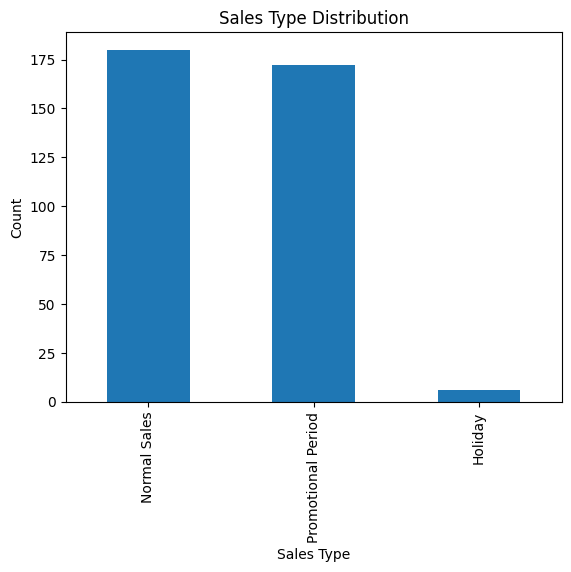

Output saved to: C:\vs\Pizza\Final_Sales.csv


In [25]:
##Feature Engineering - sales

import pandas as pd
import matplotlib.pyplot as plt
import holidays

# Load the data
file_path = r"C:\vs\Pizza\Processed_Sales_Data.csv"
df = pd.read_csv(file_path)

# Assuming df has columns 'order_date' and 'quantity'
# Group by 'order_date' and sum 'quantity'
df_daily_count = df.groupby('order_date', as_index=False).agg({'quantity': 'sum'})

# Calculate the median sales threshold
Median_sales_threshold = df_daily_count['quantity'].median()

# Load US holidays for 2015
us_holidays = holidays.US(years=2015)

# Function to classify the date as 'Normal', 'Holiday', or 'Promotional Period'
def classify_sales(row):
    if row['quantity'] > Median_sales_threshold:
        if row['order_date'] in us_holidays:
            return 'Holiday'
        else:
            return 'Promotional Period'
    else:
        return 'Normal Sales'

# Apply the classification function
df_daily_count['sales_type'] = df_daily_count.apply(classify_sales, axis=1)

# Check the classified DataFrame
print(df_daily_count.head())

# Optional: Visualize the classified sales types
df_daily_count['sales_type'].value_counts().plot(kind='bar', title='Sales Type Distribution')
plt.xlabel('Sales Type')
plt.ylabel('Count')
plt.show()

# Convert sales_type to dummy variables
df_daily_count = pd.get_dummies(df_daily_count, columns=['sales_type'])

# Rename columns for clarity
df_daily_count = df_daily_count.rename(columns={
    'sales_type_Holiday': 'Holiday',
    'sales_type_Normal Sales': 'Normal Sales',
    'sales_type_Promotional Period': 'Promotional Period'
})

# Convert boolean columns to integer
df_daily_count['Holiday'] = df_daily_count['Holiday'].map({True: 1, False: 0})
df_daily_count['Normal Sales'] = df_daily_count['Normal Sales'].map({True: 1, False: 0})
df_daily_count['Promotional Period'] = df_daily_count['Promotional Period'].map({True: 1, False: 0})

# Merge the daily count with the original DataFrame
df = pd.merge(df, df_daily_count, on='order_date', how='inner')

# Rename columns to avoid conflicts
df = df.rename(columns={'quantity_x': 'quantity', 'quantity_y': 'Total quantity per day'})

# Save the output DataFrame to a CSV file
output_file_path = r"C:\vs\Pizza\Final_Sales.csv"
df.to_csv(output_file_path, index=False)

print("Output saved to:", output_file_path)

In [26]:
df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,year,month,day_of_week,Total quantity per day,Holiday,Normal Sales,Promotional Period
0,1,1,hawaiian_m,1,2015-01-01,11:38:36 AM,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,2015,January,Thursday,162,1,0,0
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40 AM,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,2015,January,Thursday,162,1,0,0
2,3,2,five_cheese_l,1,2015-01-01,11:57:40 AM,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,2015,January,Thursday,162,1,0,0
3,4,2,ital_supr_l,1,2015-01-01,11:57:40 AM,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,2015,January,Thursday,162,1,0,0
4,5,2,mexicana_m,1,2015-01-01,11:57:40 AM,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,2015,January,Thursday,162,1,0,0


In [27]:
import pandas as pd

# Load the CSV file
file_path = r"C:\vs\Pizza\Final_Sales.csv"
df = pd.read_csv(file_path)

# Get unique value counts for each column
unique_counts = df.nunique()

# Display the unique value counts
print(unique_counts)

pizza_id                  48620
order_id                  21350
pizza_name_id                91
quantity                      4
order_date                  358
order_time                16382
unit_price                   25
total_price                  56
pizza_size                    5
pizza_category                4
pizza_ingredients            32
pizza_name                   32
year                          1
month                        12
day_of_week                   7
Total quantity per day       96
Holiday                       2
Normal Sales                  2
Promotional Period            2
dtype: int64


Pizzas sold in week 7:
The Barbecue Chicken Pizza: 54 pizzas
The Big Meat Pizza: 33 pizzas
The Brie Carre Pizza: 12 pizzas
The Calabrese Pizza: 18 pizzas
The California Chicken Pizza: 45 pizzas
The Chicken Alfredo Pizza: 19 pizzas
The Chicken Pesto Pizza: 19 pizzas
The Classic Deluxe Pizza: 39 pizzas
The Five Cheese Pizza: 30 pizzas
The Four Cheese Pizza: 45 pizzas
The Greek Pizza: 34 pizzas
The Green Garden Pizza: 26 pizzas
The Hawaiian Pizza: 45 pizzas
The Italian Capocollo Pizza: 27 pizzas
The Italian Supreme Pizza: 36 pizzas
The Italian Vegetables Pizza: 28 pizzas
The Mediterranean Pizza: 11 pizzas
The Mexicana Pizza: 35 pizzas
The Napolitana Pizza: 28 pizzas
The Pepper Salami Pizza: 17 pizzas
The Pepperoni Pizza: 55 pizzas
The Pepperoni, Mushroom, and Peppers Pizza: 24 pizzas
The Prosciutto and Arugula Pizza: 29 pizzas
The Sicilian Pizza: 53 pizzas
The Soppressata Pizza: 19 pizzas
The Southwest Chicken Pizza: 41 pizzas
The Spicy Italian Pizza: 33 pizzas
The Spinach Pesto Pizza: 15

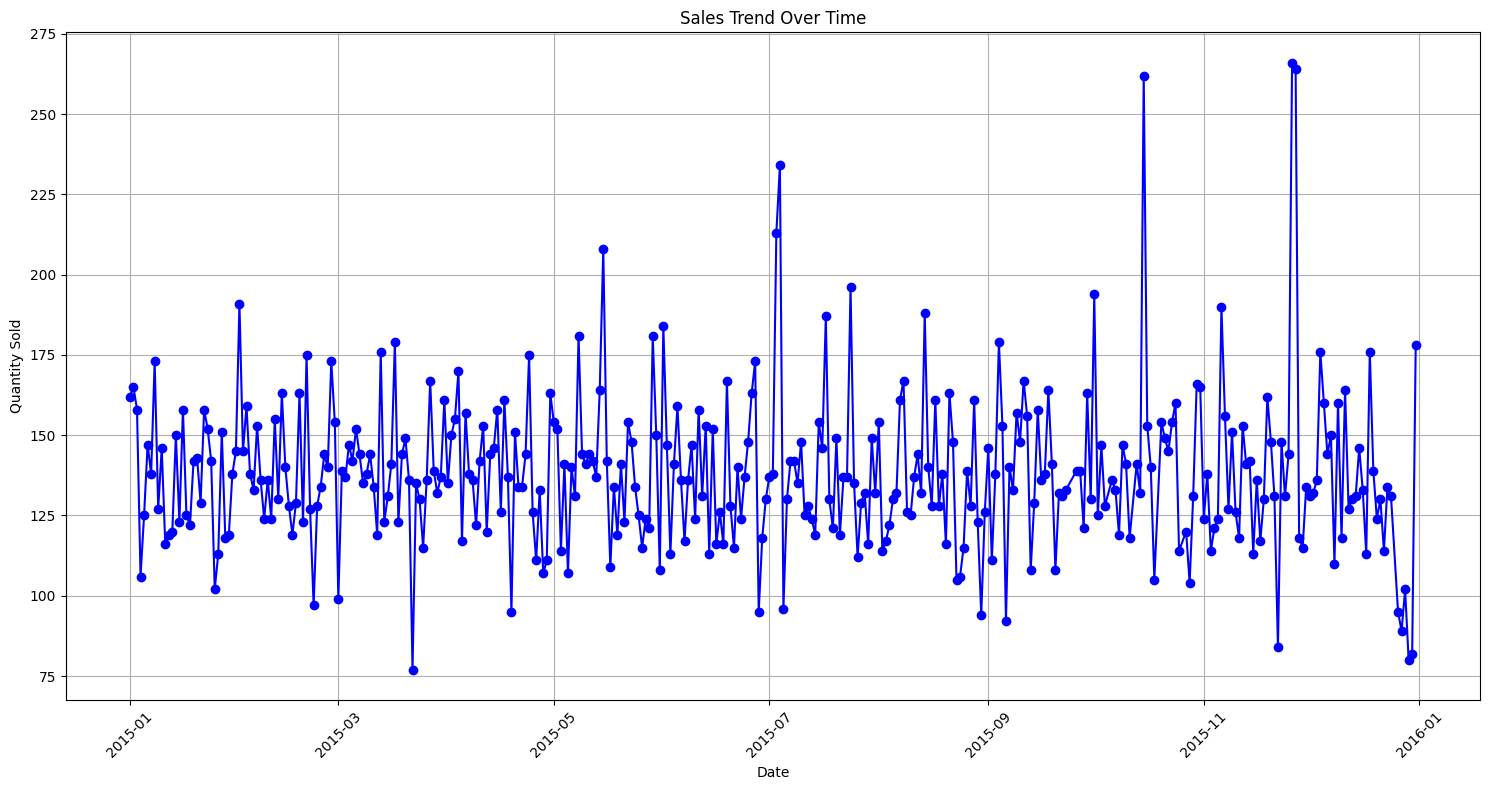

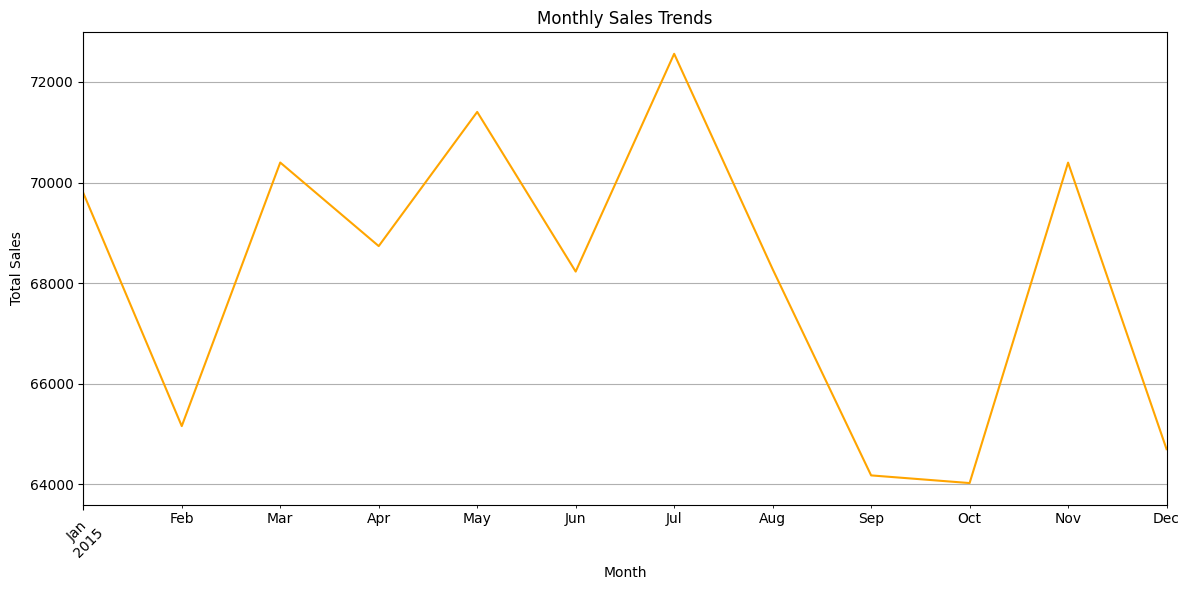

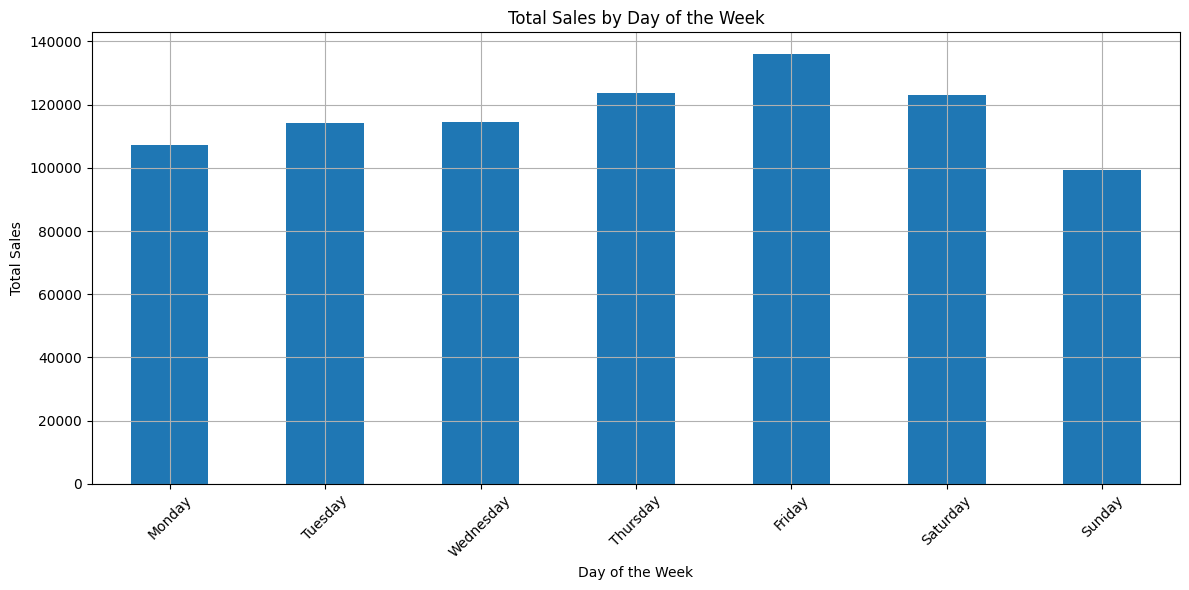

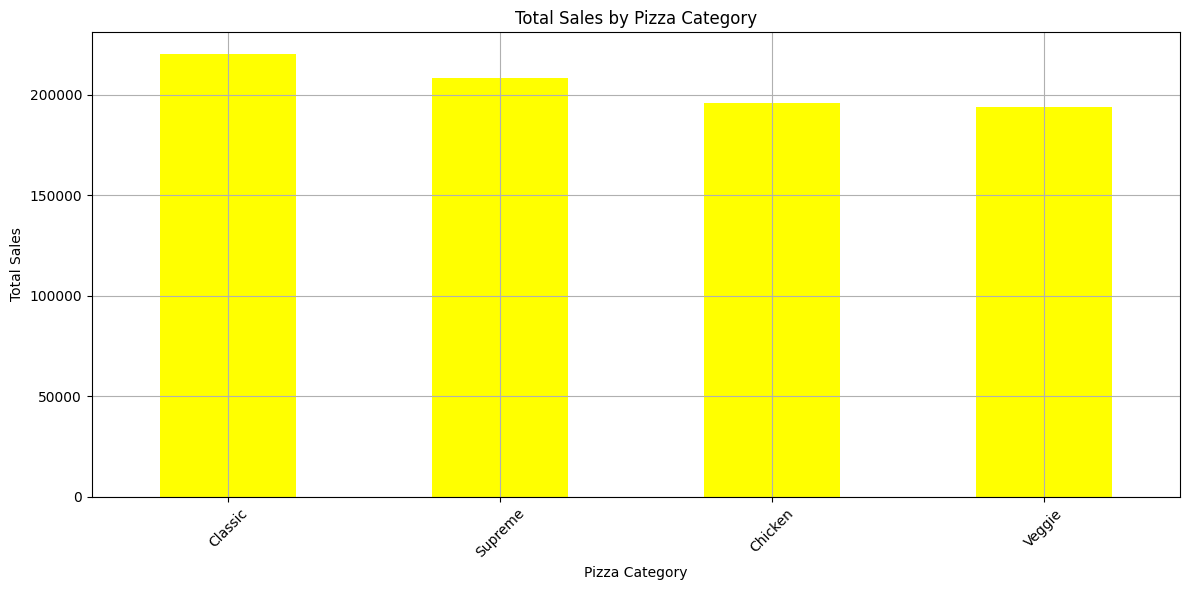

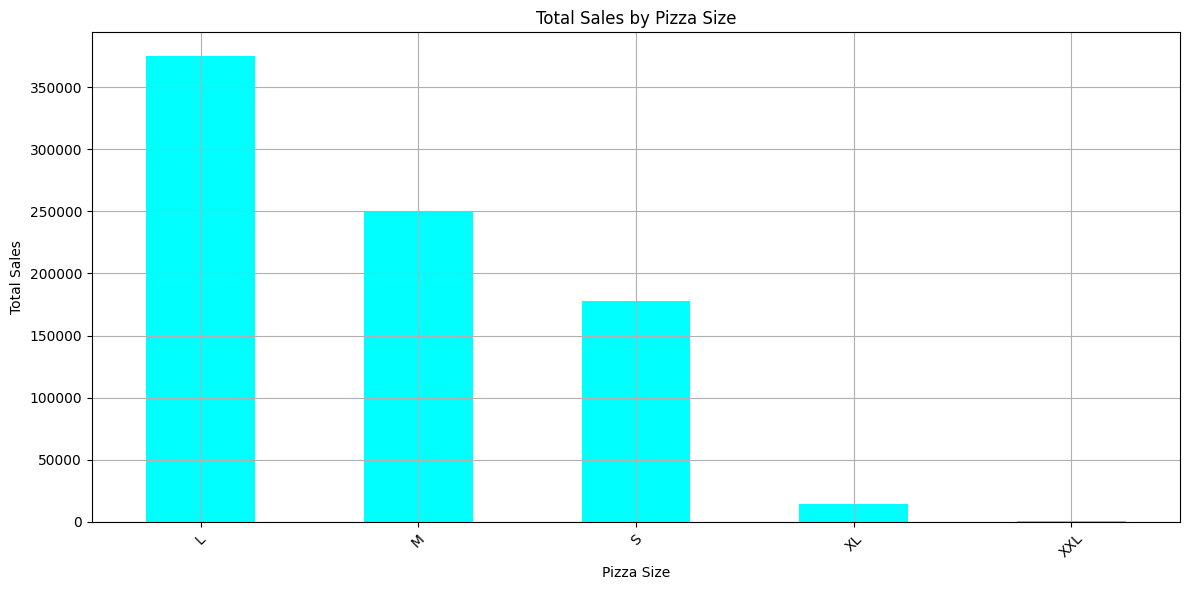

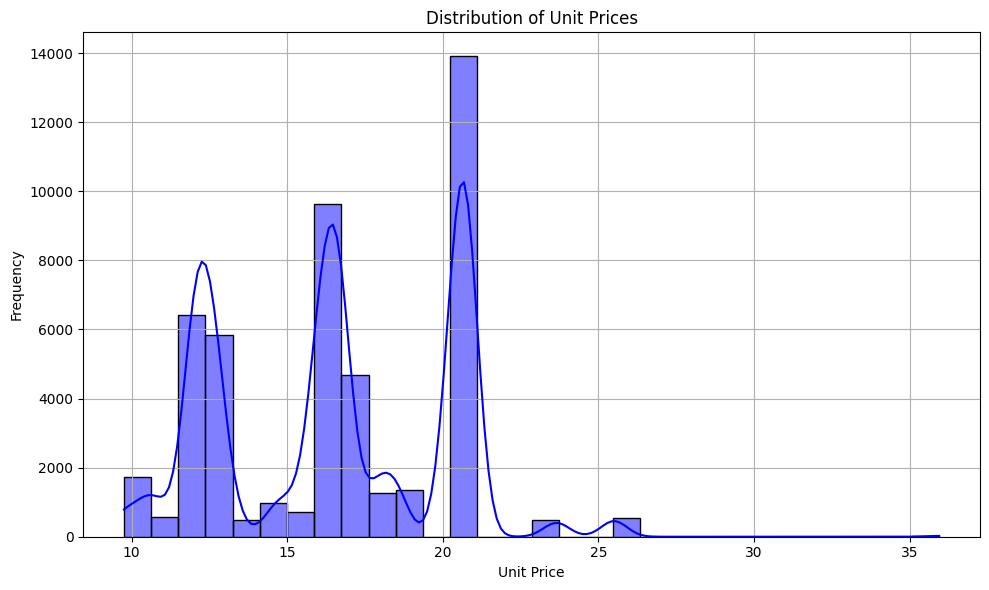

In [30]:
###Exploratory Data Analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = r"C:\vs\Pizza\Final_Sales.csv"
df = pd.read_csv(file_path)

# Ensure 'order_date' is in datetime format
df['order_date'] = pd.to_datetime(df['order_date'])

# Extract the week number from 'order_date'
df['week'] = df['order_date'].dt.isocalendar().week

# Step 1: Filter the dataset for week 7
week_7_sales = df[df['week'] == 7]

# Step 2: Group by pizza name and sum the quantities
grouped_sales = week_7_sales.groupby('pizza_name')['quantity'].sum().reset_index()

# Step 3: List all grouped pizza names and their total quantities
print("Pizzas sold in week 7:")
for _, row in grouped_sales.iterrows():
    print(f"{row['pizza_name']}: {row['quantity']} pizzas")

# Step 4: Calculate and print the total quantity sold in week 7
total_quantity_sold = week_7_sales['quantity'].sum()
print(f"\nTotal units of pizza sold in week 7: {total_quantity_sold} pizzas")

# Extract additional time-based features
df['month'] = df['order_date'].dt.month
df['day_of_week'] = df['order_date'].dt.day_name()
df['year'] = df['order_date'].dt.year

# Check for missing values
print("Missing values in each column:\n", df.isnull().sum())

# 1. Sales Trend Over Time
sales_trend = df.groupby('order_date')['quantity'].sum().reset_index()

plt.figure(figsize=(15, 8))
plt.plot(sales_trend['order_date'], sales_trend['quantity'], marker='o', color='b')
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

# 2. Monthly Sales Trends
df['total_price'] = pd.to_numeric(df['total_price'], errors='coerce')

monthly_sales = df.resample('M', on='order_date')['total_price'].sum()

plt.figure(figsize=(12, 6))
monthly_sales.plot(color='orange')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

# 3. Sales by Day of the Week
weekly_sales = df.groupby('day_of_week')['total_price'].sum()

ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_sales = weekly_sales.reindex(ordered_days)

plt.figure(figsize=(12, 6))
weekly_sales.plot(kind='bar')
plt.title('Total Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

# 6. Total Sales by Pizza Category
category_sales = df.groupby('pizza_category')['total_price'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
category_sales.plot(kind='bar', color='yellow')
plt.title('Total Sales by Pizza Category')
plt.xlabel('Pizza Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

# 7. Total Sales by Pizza Size
size_sales = df.groupby('pizza_size')['total_price'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
size_sales.plot(kind='bar', color='cyan')
plt.title('Total Sales by Pizza Size')
plt.xlabel('Pizza Size')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

# 8. Distribution of Unit Prices
plt.figure(figsize=(10, 6))
sns.histplot(df['unit_price'], bins=30, kde=True, color='blue')
plt.title('Distribution of Unit Prices')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.grid()
plt.tight_layout()
plt.show()


In [ ]:
###Data Exploration - Ingredients

import pandas as pd

# Load the dataset
df = pd.read_csv(r"D:\Guvi\projects\Dominos_Predictive_Purchase_Order_System\Ingredients.csv")

# Display basic info about the DataFrame
print("DataFrame Info:")
df.info()

# Check for duplicate rows
duplicates = df.duplicated().sum()
print("Number of duplicate rows: ", duplicates)

# Remove duplicate rows if any
df = df.drop_duplicates()

# Verify that there are no more duplicates
duplicates_after = df.duplicated().sum()
print("Number of duplicate rows after cleaning: ", duplicates_after)

# Get unique values for each column
unique_values = {column: df[column].unique() for column in df.columns}

# Print the unique values
for column, values in unique_values.items():
    print(f"Unique values for column '{column}':")
    print(values)
    print()  # Print an empty line for better readability